In [ ]:
# KCF

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import seaborn as sns

# Read In Data
<hr/>

     google dashboard Download
     
     'Full Report' ---- behavior, site content, all pages

    

In [2]:
## excel doc sheet 0
# data meta

pd.read_excel('../data/Analytics All Web Site Data Pages 20200101-20210223.xlsx',sheet_name=0)

,All Web Site Data
0,Pages
1,20200101-20210223
2,Links to data:
3,Dataset1
4,Dataset2


In [3]:
## excel doc sheet 1
# number of pageviews per page for total time frame

pageviews_per_page_df = pd.read_excel(
    '../data/Analytics All Web Site Data Pages 20200101-20210223.xlsx',sheet_name=1)
print(pageviews_per_page_df.shape)
print()
pageviews_per_page_df.head()

(11, 8)



,Page,Pageviews,Unique Pageviews,Avg. Time on Page,Entrances,Bounce Rate,% Exit,Page Value
0,/,1171,1049,331.569444,1019,0.842002,0.815542,0
1,/walkforeducation,113,107,322.941176,64,0.968750,0.849558,0
2,/yoga-pops-fundraiser,58,50,221.545455,44,0.818182,0.810345,0
3,/2021-blankets-for-india,38,27,171.916667,26,0.692308,0.684211,0
4,/donate,37,37,98.750000,33,0.878788,0.891892,0


In [4]:
## excel doc sheet 2
# number of pageviews per day (all pages)

pageviews_perDay_df = pd.read_excel('../data/Analytics All Web Site Data Pages 20200101-20210223.xlsx',sheet_name=2)
print(pageviews_perDay_df.shape)
print()
pageviews_perDay_df.head()

(421, 2)



,Day Index,Pageviews
0,2020-01-01,0
1,2020-01-02,0
2,2020-01-03,0
3,2020-01-04,0
4,2020-01-05,0


In [19]:
social_df = pd.read_excel('../data/Analytics All Web Site Data Channels 20200721-20210223.xlsx',sheet_name=1)
social_df 

,Social Network,Users,New Users,Sessions,Bounce Rate,Pages / Session,Avg. Session Duration,Donate (Goal 1 Conversion Rate),Donate (Goal 1 Completions),Donate (Goal 1 Value)
0,Facebook,278,267,353,0.881020,1.155807,26.580737,0,0,0
1,LinkedIn,6,4,8,1.000000,1.000000,0.000000,0,0,0
2,YouTube,2,2,2,0.500000,2.000000,163.000000,0,0,0
3,Twitter,1,1,1,0.000000,2.000000,279.000000,0,0,0
4,NaN,287,274,364,0.879121,1.159341,27.439560,0,0,0


# EDA
<hr>

In [220]:
pageviews_per_page_df

,Pageviews,Unique Pageviews,Avg. Time on Page,Entrances,Bounce Rate,% Exit,Page Value
Page,,,,,,,
/,1171,1049,331.569444,1019,0.842002,0.815542,0
/walkforeducation,113,107,322.941176,64,0.968750,0.849558,0
/yoga-pops-fundraiser,58,50,221.545455,44,0.818182,0.810345,0
/2021-blankets-for-india,38,27,171.916667,26,0.692308,0.684211,0
/donate,37,37,98.750000,33,0.878788,0.891892,0
/about,29,29,122.500000,25,0.920000,0.931034,0
/angelpatron,21,20,123.500000,19,0.894737,0.904762,0
/volunteerwithus,16,15,117.500000,13,0.846154,0.875000,0
/sponsorships,15,15,158.000000,10,0.900000,0.933333,0


In [182]:
""" """

def cleanup(df, column_number):
    c = 0
    # create column of pages
    column = df.iloc[:,column_number]
    
    # loop in column (c as counter)
    for page_name in column:
        
        # check for int, float (nan's type == float)
        if type(page_name) == type('str'):
            
            # create blank list
            clean_name = []
            
            # nested loop 
            for m in page_name:
                # Meat & Potatos
                #
                if (m == '/'):            # What is best practices for this if / else 
                    m = m  
                else:
                    if m == '-':
                        clean_name.append(' ')
                    else: 
                        clean_name.append(m)
                        
        # 
        #''.join(clean_name)
        df.iloc[c,column_number] = ''.join(clean_name)
        print(df.iloc[c,column_number])
        c += 1
    
    return 

In [181]:
cleanup(pageviews_per_page_df, 0)

/
/walkforeducation
/yoga-pops-fundraiser
/2021-blankets-for-india
/donate
/about
/angelpatron
/volunteerwithus
/sponsorships
/?requestedBy=screenshoter&suppressbi=true
nan


In [183]:
# clean up page name 

x  =  pageviews_per_page_df.iloc[2,0]

# if x is str (try exclude)

# x ==  strings, No floats No integers (nans are floats)


print(x)
print(type(x))
#print(len(x))
page = []
for m in x:
    
    # Nested if loops 
    if m == '/':            # What is best practices for this if / else 
        m = m  
    else:
        if m == '-':
            page.append(' ')
        else: 
            page.append(m)
            
#print(page)

print(''.join(page))

# loop through each varable to check char, and replace if needed 

(type(x) == type('str'))

/yoga-pops-fundraiser
<class 'str'>
yoga pops fundraiser


True

In [239]:
# turns nan to total 

pageviews_per_page_df.iloc[-1,0] = "Total"
pageviews_per_page_df = pageviews_per_page_df.set_index('Page')
pageviews_per_page_df.drop(index = 'Total', inplace = True)

,Pageviews,Unique Pageviews,Avg. Time on Page,Entrances,Bounce Rate,% Exit,Page Value
Page,,,,,,,
/,1171,1049,331.569444,1019,0.842002,0.815542,0
/walkforeducation,113,107,322.941176,64,0.968750,0.849558,0
/yoga-pops-fundraiser,58,50,221.545455,44,0.818182,0.810345,0
/2021-blankets-for-india,38,27,171.916667,26,0.692308,0.684211,0
/donate,37,37,98.750000,33,0.878788,0.891892,0
/about,29,29,122.500000,25,0.920000,0.931034,0
/angelpatron,21,20,123.500000,19,0.894737,0.904762,0
/volunteerwithus,16,15,117.500000,13,0.846154,0.875000,0
/sponsorships,15,15,158.000000,10,0.900000,0.933333,0


In [240]:
pageviews_per_page_df

,Pageviews,Unique Pageviews,Avg. Time on Page,Entrances,Bounce Rate,% Exit,Page Value
Page,,,,,,,
/,1171,1049,331.569444,1019,0.842002,0.815542,0
/walkforeducation,113,107,322.941176,64,0.968750,0.849558,0
/yoga-pops-fundraiser,58,50,221.545455,44,0.818182,0.810345,0
/2021-blankets-for-india,38,27,171.916667,26,0.692308,0.684211,0
/donate,37,37,98.750000,33,0.878788,0.891892,0
/about,29,29,122.500000,25,0.920000,0.931034,0
/angelpatron,21,20,123.500000,19,0.894737,0.904762,0
/volunteerwithus,16,15,117.500000,13,0.846154,0.875000,0
/sponsorships,15,15,158.000000,10,0.900000,0.933333,0


In [241]:
# Does not flatten when set index used 
    #columns.get_level_values(0)
    #columns.to_flat_index()

#pageviews_per_page_df.columns = pageviews_per_page_df.columns.to_flat_index()



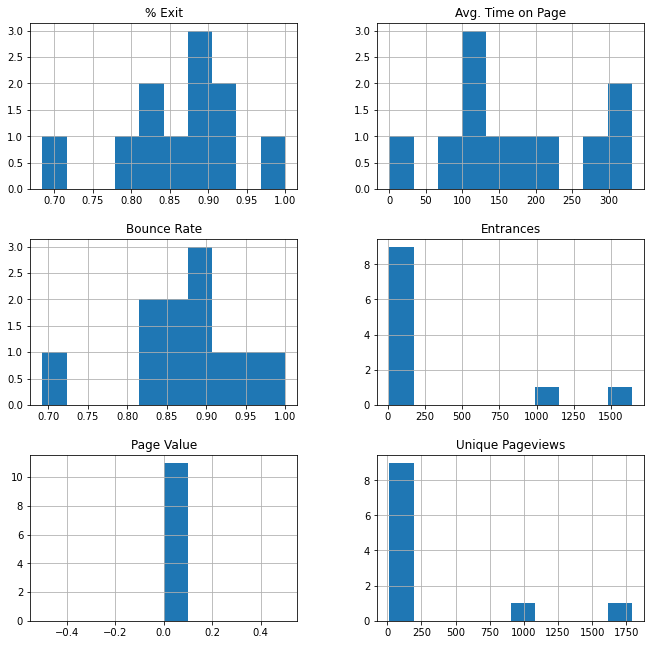

In [246]:
# distrobution of numbers 

pageviews_per_page_df.hist(figsize = (11,11));

In [252]:
# Describe

pageviews_per_page_df.describe()

,Unique Pageviews,Avg. Time on Page,Entrances,Bounce Rate,% Exit,Page Value
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.0
mean,286.727273,178.485050,264.272727,0.874773,0.866274,0.0
std,584.951125,104.073467,544.882389,0.081347,0.083067,0.0
min,14.000000,0.000000,10.000000,0.692308,0.684211,0.0
25%,17.500000,120.000000,16.500000,0.844078,0.824438,0.0
50%,29.000000,158.000000,26.000000,0.878788,0.875000,0.0
75%,78.500000,258.329130,54.000000,0.910000,0.917898,0.0
max,1791.000000,331.569444,1640.000000,1.000000,1.000000,0.0


In [ ]:
#Bounce Rate

pageviews_per_page_df['Bounce Rate'].mean()  

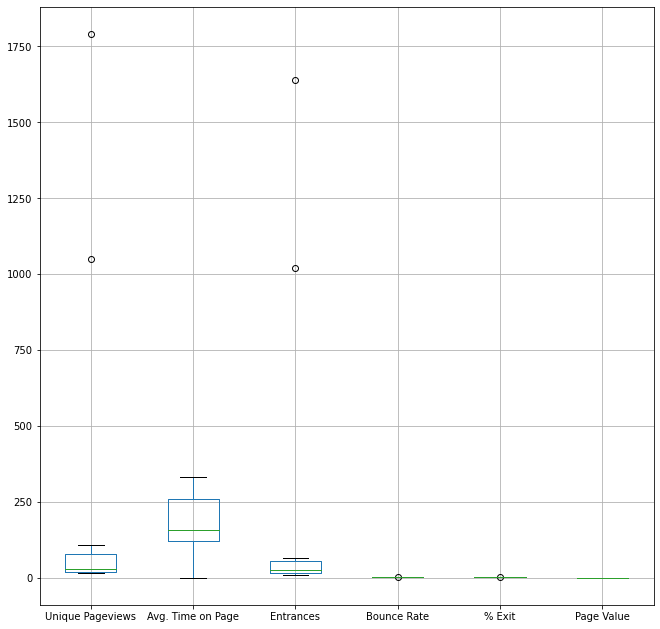

In [260]:
#Bounce Rate

pageviews_per_page_df[ pageviews_per_page_df['']].boxplot(figsize = (11,11));

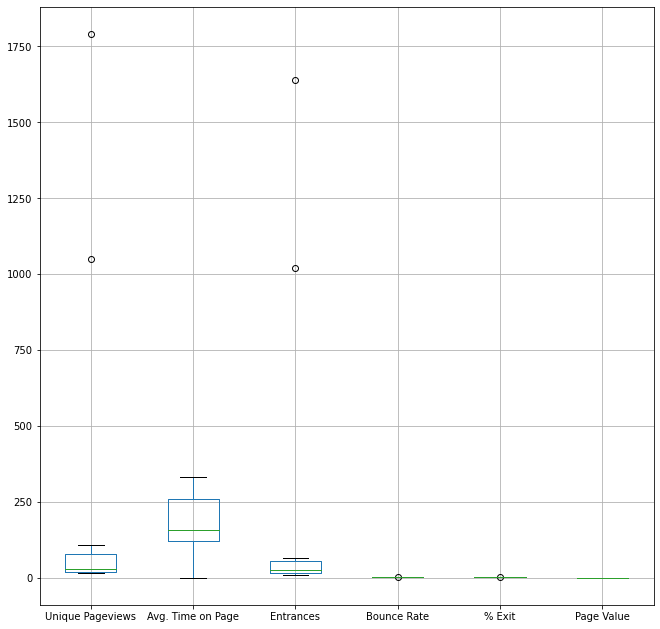

In [267]:
pageviews_per_page_df.boxplot(figsize = (11,11));

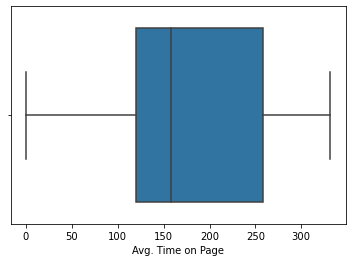

In [281]:
# of all pages mentioned, average time on page

sns.boxplot(data = pageviews_per_page_df, x = ('Avg. Time on Page'));

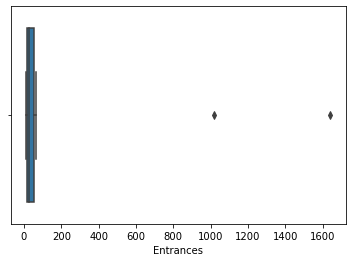

In [282]:
sns.boxplot(data = pageviews_per_page_df, x = ('Entrances'));

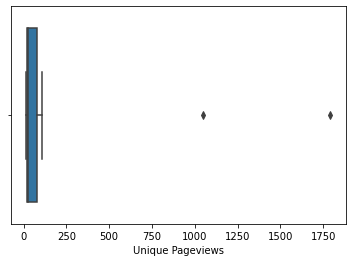

In [285]:
sns.boxplot(data = pageviews_per_page_df, x = ('Unique Pageviews'));

In [286]:
sns.hist()

AttributeError: module 'seaborn' has no attribute 'hist'

In [288]:
sns.distplot(pageviews_per_page_df)

TypeError: distplot() got an unexpected keyword argument 'data'

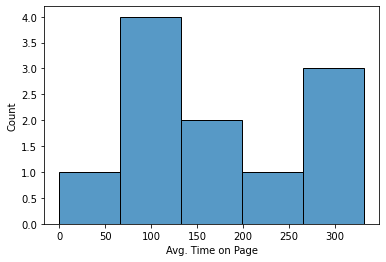

In [291]:
sns.histplot(data = pageviews_per_page_df, x = 'Avg. Time on Page')

# pageviews_perDay_df

In [301]:
pageviews_perDay_df.head(2)

,Pageviews
Day Index,
2020-01-01,0
2020-01-02,0


In [299]:
# set 'day index' as datetime

pageviews_perDay_df['Day Index'] = pd.to_datetime(pageviews_perDay_df['Day Index'])

# set index
pageviews_perDay_df = pageviews_perDay_df.set_index('Day Index')
pageviews_perDay_df,head()

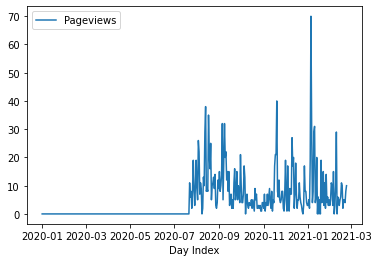

In [306]:
# pageviews

sns.lineplot(data = pageviews_perDay_df);

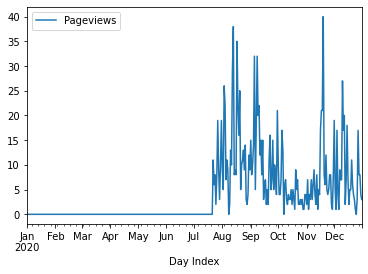

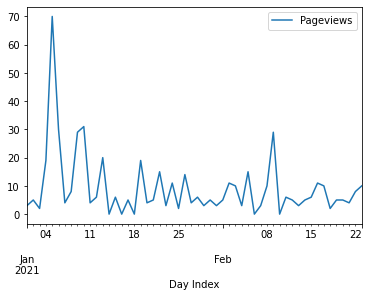

In [318]:
# page views by year 

pageviews_perDay_df.groupby(pageviews_perDay_df.index.year).plot();

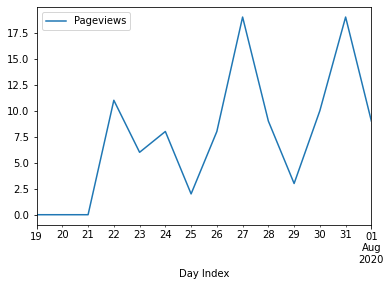

In [327]:
# inspection of start of analytics

pageviews_perDay_df['2020-7-19':'2020-8-1'].plot()

In [330]:
# remove dates before Google Analitics was activated 

pageviews_perDay_df = pageviews_perDay_df['2020-7-21':'2022-1-1']

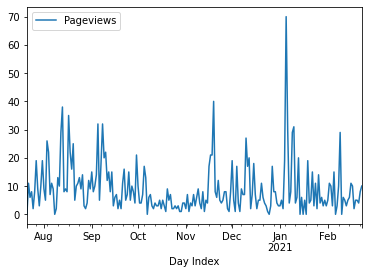

In [331]:
pageviews_perDay_df.plot()

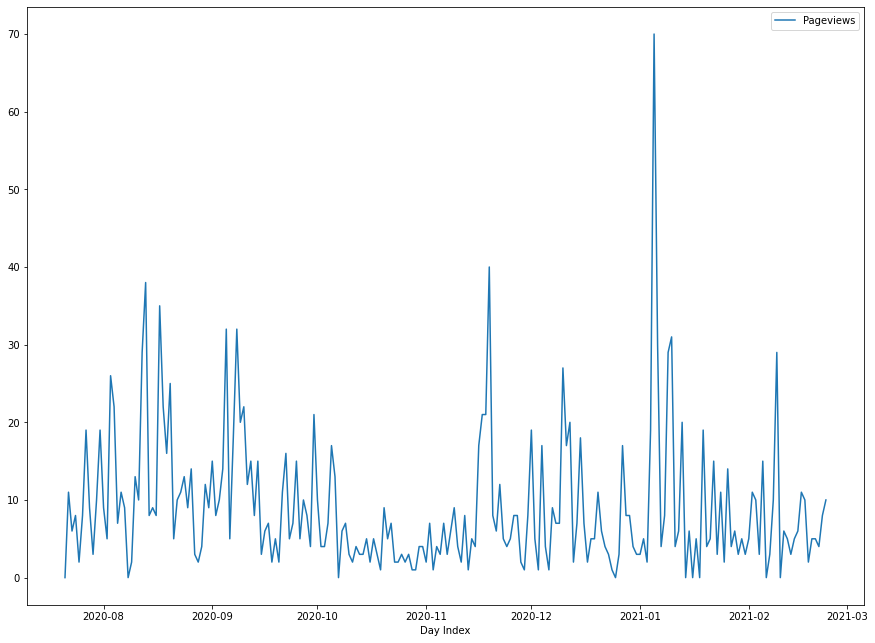

In [336]:
# lineplot of pageviews 
plt.figure(figsize = (15,11))
sns.lineplot(data = pageviews_perDay_df);

In [ ]:
# social_df 

In [29]:
social_df.drop(4, axis = 0, inplace = True) 
social_df

KeyError: '[4] not found in axis'

In [30]:
social_df


,Social Network,Users,New Users,Sessions,Bounce Rate,Pages / Session,Avg. Session Duration,Donate (Goal 1 Conversion Rate),Donate (Goal 1 Completions),Donate (Goal 1 Value)
0,Facebook,278,267,353,0.88102,1.155807,26.580737,0,0,0
1,LinkedIn,6,4,8,1.00000,1.000000,0.000000,0,0,0
2,YouTube,2,2,2,0.50000,2.000000,163.000000,0,0,0
3,Twitter,1,1,1,0.00000,2.000000,279.000000,0,0,0


In [ ]:
 youtube and twitter -  had muhc longer avg session time -
    maybe due to 